In [2]:
%matplotlib inline
import numpy as np
import pylab as plt
from matplotlib.gridspec import GridSpec
from astropy.table import Table, vstack, Column, MaskedColumn
from astropy import units as u
from scipy.stats import kde
from scipy.stats import binned_statistic as b_s
from scipy.stats import binned_statistic_2d as bs2d
from astropy import units as un
from astropy import constants as con
from matplotlib.lines import Line2D

from astropy.cosmology import Planck15
from tqdm import trange
from scipy.stats import ks_2samp
from scipy import special

import os
os.environ['PATH'] = os.environ['PATH'] + ':/usr/texbin'

plt.rc('path', simplify=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('axes', labelsize='xx-large', facecolor='none', linewidth=0.7)
plt.rc('xtick', labelsize='x-large')
plt.rc('ytick', labelsize='x-large')
plt.rc('lines', markersize=4, linewidth=1, markeredgewidth=0.2)
plt.rc('legend', numpoints=1, frameon=False, handletextpad=0.3, scatterpoints=1, handlelength=2, handleheight=0.1)
#plt.rc('savefig', facecolor='none', frameon='False')

params =   {'font.size' : 16,
            'xtick.major.size': 8,
            'ytick.major.size': 8,
            'xtick.minor.size': 3,
            'ytick.minor.size': 3,
            }
plt.rcParams.update(params) 

np.warnings.filterwarnings('ignore')

def legend_outside_plot(ax,location='top',ncol=3,pad=0, handles=None, labels=None):
    if handles==None:
        handles, labels = ax.get_legend_handles_labels()
    if location=='top':
        leg = ax.legend(handles=handles, labels=labels, bbox_to_anchor=(0,1.02+pad,1,0.2), loc="lower left",
                mode="expand", borderaxespad=0, ncol=ncol)
    else:
        print("Location",location,"not implemented. Please code up")
    return leg





In [3]:
T1LMatched1045 = Table.read('T1LMatched1045.fits', format = 'ascii' )
T2LMatched1045 = Table.read('T2LMatched1045.fits', format = 'ascii' )

T1LMatchedFIRST = Table.read('T1LMatchFIRST.fits', format = 'fits' )
T1LMatchedLOFAR = Table.read('T1LMatchLOFAR.fits', format = 'fits' )
T1LMatchedXRAYi = Table.read('T1LMatchXRAYi.fits', format = 'fits' )

T2LMatchedFIRST = Table.read('T2LMatchFIRST.fits', format = 'fits' )
T2LMatchedLOFAR = Table.read('T2LMatchLOFAR.fits', format = 'fits' )
T2LMatchedXRAYi = Table.read('T2LMatchXRAYi.fits', format = 'fits' )

In [4]:
T1LMatched1045.rename_column('col1', 'RA')  
T1LMatched1045.rename_column('col2', 'Dec') 
T1LMatched1045.rename_column('col3', 'Imag') 
T1LMatched1045.rename_column('col4', 'S')  
T1LMatched1045.rename_column('col5', 'zspec') 
T1LMatched1045.rename_column('col6', 'N')  
T1LMatched1045.rename_column('col7', 'zG')  
T1LMatched1045.rename_column('col8', 'chi2G')  
T1LMatched1045.rename_column('col9', 'LEll')  
T1LMatched1045.rename_column('col10', 'LSbc') 
T1LMatched1045.rename_column('col11', 'LIrr')
T1LMatched1045.rename_column('col12', 'zGA') 
T1LMatched1045.rename_column('col13', 'chi2GA') 
T1LMatched1045.rename_column('col14', 'LAGNp') 
T1LMatched1045.rename_column('col15', 'LELLp') 
T1LMatched1045.rename_column('col16', 'LSbcp') 
T1LMatched1045.rename_column('col17', 'LIrrp') 
T1LMatched1045.rename_column('col18', 'F') 
T1LMatched1045.rename_column('col19', 'EBV') 
T1LMatched1045.rename_column('col20', 'Chi2S') 
T1LMatched1045.rename_column('col21', 'SType') 
T1LMatched1045.rename_column('col22', 'LAGNerg') 
T1LMatched1045.rename_column('col23', 'LSbcerg') 
T1LMatched1045.rename_column('col24', 'LEllerg') 
T1LMatched1045.rename_column('col25', 'LIrrerg') 
T1LMatched1045.rename_column('col26', 'AV') 

T2LMatched1045.rename_column('col1', 'RA')  
T2LMatched1045.rename_column('col2', 'Dec') 
T2LMatched1045.rename_column('col3', 'Imag') 
T2LMatched1045.rename_column('col4', 'S')  
T2LMatched1045.rename_column('col5', 'zspec') 
T2LMatched1045.rename_column('col6', 'N')  
T2LMatched1045.rename_column('col7', 'zG')  
T2LMatched1045.rename_column('col8', 'chi2G')  
T2LMatched1045.rename_column('col9', 'LEll')  
T2LMatched1045.rename_column('col10', 'LSbc') 
T2LMatched1045.rename_column('col11', 'LIrr')
T2LMatched1045.rename_column('col12', 'zGA') 
T2LMatched1045.rename_column('col13', 'chi2GA') 
T2LMatched1045.rename_column('col14', 'LAGNp') 
T2LMatched1045.rename_column('col15', 'LELLp') 
T2LMatched1045.rename_column('col16', 'LSbcp') 
T2LMatched1045.rename_column('col17', 'LIrrp') 
T2LMatched1045.rename_column('col18', 'F') 
T2LMatched1045.rename_column('col19', 'EBV') 
T2LMatched1045.rename_column('col20', 'Chi2S') 
T2LMatched1045.rename_column('col21', 'SType')
T2LMatched1045.rename_column('col22', 'LAGNerg') 
T2LMatched1045.rename_column('col23', 'LSbcerg') 
T2LMatched1045.rename_column('col24', 'LEllerg') 
T2LMatched1045.rename_column('col25', 'LIrrerg') 
T2LMatched1045.rename_column('col26', 'AV') 

T1LMatchedFIRST.rename_column('col1', 'RA1')  
T1LMatchedFIRST.rename_column('col2', 'Dec1') 
T1LMatchedFIRST.rename_column('col3', 'Imag') 
T1LMatchedFIRST.rename_column('col4', 'S')  
T1LMatchedFIRST.rename_column('col5', 'zspec') 
T1LMatchedFIRST.rename_column('col6', 'N')  
T1LMatchedFIRST.rename_column('col7', 'zG')  
T1LMatchedFIRST.rename_column('col8', 'chi2G')  
T1LMatchedFIRST.rename_column('col9', 'LEll')  
T1LMatchedFIRST.rename_column('col10', 'LSbc') 
T1LMatchedFIRST.rename_column('col11', 'LIrr')
T1LMatchedFIRST.rename_column('col12', 'zGA') 
T1LMatchedFIRST.rename_column('col13', 'chi2GA') 
T1LMatchedFIRST.rename_column('col14', 'LAGNp') 
T1LMatchedFIRST.rename_column('col15', 'LELLp') 
T1LMatchedFIRST.rename_column('col16', 'LSbcp') 
T1LMatchedFIRST.rename_column('col17', 'LIrrp') 
T1LMatchedFIRST.rename_column('col18', 'F') 
T1LMatchedFIRST.rename_column('col19', 'EBV') 
T1LMatchedFIRST.rename_column('col20', 'Chi2S') 
T1LMatchedFIRST.rename_column('col21', 'SType') 
T1LMatchedFIRST.rename_column('col22', 'LAGNerg') 
T1LMatchedFIRST.rename_column('col23', 'LSbcerg') 
T1LMatchedFIRST.rename_column('col24', 'LEllerg') 
T1LMatchedFIRST.rename_column('col25', 'LIrrerg') 
T1LMatchedFIRST.rename_column('col26', 'AV') 

T2LMatchedFIRST.rename_column('col1', 'RA1')  
T2LMatchedFIRST.rename_column('col2', 'Dec1') 
T2LMatchedFIRST.rename_column('col3', 'Imag') 
T2LMatchedFIRST.rename_column('col4', 'S')  
T2LMatchedFIRST.rename_column('col5', 'zspec') 
T2LMatchedFIRST.rename_column('col6', 'N')  
T2LMatchedFIRST.rename_column('col7', 'zG')  
T2LMatchedFIRST.rename_column('col8', 'chi2G')  
T2LMatchedFIRST.rename_column('col9', 'LEll')  
T2LMatchedFIRST.rename_column('col10', 'LSbc') 
T2LMatchedFIRST.rename_column('col11', 'LIrr')
T2LMatchedFIRST.rename_column('col12', 'zGA') 
T2LMatchedFIRST.rename_column('col13', 'chi2GA') 
T2LMatchedFIRST.rename_column('col14', 'LAGNp') 
T2LMatchedFIRST.rename_column('col15', 'LELLp') 
T2LMatchedFIRST.rename_column('col16', 'LSbcp') 
T2LMatchedFIRST.rename_column('col17', 'LIrrp') 
T2LMatchedFIRST.rename_column('col18', 'F') 
T2LMatchedFIRST.rename_column('col19', 'EBV') 
T2LMatchedFIRST.rename_column('col20', 'Chi2S') 
T2LMatchedFIRST.rename_column('col21', 'SType')
T2LMatchedFIRST.rename_column('col22', 'LAGNerg') 
T2LMatchedFIRST.rename_column('col23', 'LSbcerg') 
T2LMatchedFIRST.rename_column('col24', 'LEllerg') 
T2LMatchedFIRST.rename_column('col25', 'LIrrerg') 
T2LMatchedFIRST.rename_column('col26', 'AV') 

T1LMatchedLOFAR.rename_column('col1', 'RA1')  
T1LMatchedLOFAR.rename_column('col2', 'Dec1') 
T1LMatchedLOFAR.rename_column('col3', 'Imag') 
T1LMatchedLOFAR.rename_column('col4', 'S')  
T1LMatchedLOFAR.rename_column('col5', 'zspec') 
T1LMatchedLOFAR.rename_column('col6', 'N')  
T1LMatchedLOFAR.rename_column('col7', 'zG')  
T1LMatchedLOFAR.rename_column('col8', 'chi2G')  
T1LMatchedLOFAR.rename_column('col9', 'LEll')  
T1LMatchedLOFAR.rename_column('col10', 'LSbc') 
T1LMatchedLOFAR.rename_column('col11', 'LIrr')
T1LMatchedLOFAR.rename_column('col12', 'zGA') 
T1LMatchedLOFAR.rename_column('col13', 'chi2GA') 
T1LMatchedLOFAR.rename_column('col14', 'LAGNp') 
T1LMatchedLOFAR.rename_column('col15', 'LELLp') 
T1LMatchedLOFAR.rename_column('col16', 'LSbcp') 
T1LMatchedLOFAR.rename_column('col17', 'LIrrp') 
T1LMatchedLOFAR.rename_column('col18', 'F') 
T1LMatchedLOFAR.rename_column('col19', 'EBV') 
T1LMatchedLOFAR.rename_column('col20', 'Chi2S') 
T1LMatchedLOFAR.rename_column('col21', 'SType') 
T1LMatchedLOFAR.rename_column('col22', 'LAGNerg') 
T1LMatchedLOFAR.rename_column('col23', 'LSbcerg') 
T1LMatchedLOFAR.rename_column('col24', 'LEllerg') 
T1LMatchedLOFAR.rename_column('col25', 'LIrrerg') 
T1LMatchedLOFAR.rename_column('col26', 'AV') 

T2LMatchedLOFAR.rename_column('col1', 'RA1')  
T2LMatchedLOFAR.rename_column('col2', 'Dec1') 
T2LMatchedLOFAR.rename_column('col3', 'Imag') 
T2LMatchedLOFAR.rename_column('col4', 'S')  
T2LMatchedLOFAR.rename_column('col5', 'zspec') 
T2LMatchedLOFAR.rename_column('col6', 'N')  
T2LMatchedLOFAR.rename_column('col7', 'zG')  
T2LMatchedLOFAR.rename_column('col8', 'chi2G')  
T2LMatchedLOFAR.rename_column('col9', 'LEll')  
T2LMatchedLOFAR.rename_column('col10', 'LSbc') 
T2LMatchedLOFAR.rename_column('col11', 'LIrr')
T2LMatchedLOFAR.rename_column('col12', 'zGA') 
T2LMatchedLOFAR.rename_column('col13', 'chi2GA') 
T2LMatchedLOFAR.rename_column('col14', 'LAGNp') 
T2LMatchedLOFAR.rename_column('col15', 'LELLp') 
T2LMatchedLOFAR.rename_column('col16', 'LSbcp') 
T2LMatchedLOFAR.rename_column('col17', 'LIrrp') 
T2LMatchedLOFAR.rename_column('col18', 'F') 
T2LMatchedLOFAR.rename_column('col19', 'EBV') 
T2LMatchedLOFAR.rename_column('col20', 'Chi2S') 
T2LMatchedLOFAR.rename_column('col21', 'SType')
T2LMatchedLOFAR.rename_column('col22', 'LAGNerg') 
T2LMatchedLOFAR.rename_column('col23', 'LSbcerg') 
T2LMatchedLOFAR.rename_column('col24', 'LEllerg') 
T2LMatchedLOFAR.rename_column('col25', 'LIrrerg') 
T2LMatchedLOFAR.rename_column('col26', 'AV') 

T1LMatchedXRAYi.rename_column('col1', 'RA1')  
T1LMatchedXRAYi.rename_column('col2', 'Dec1') 
T1LMatchedXRAYi.rename_column('col3', 'Imag') 
T1LMatchedXRAYi.rename_column('col4', 'S')  
T1LMatchedXRAYi.rename_column('col5', 'zspec') 
T1LMatchedXRAYi.rename_column('col6', 'N')  
T1LMatchedXRAYi.rename_column('col7', 'zG')  
T1LMatchedXRAYi.rename_column('col8', 'chi2G')  
T1LMatchedXRAYi.rename_column('col9', 'LEll')  
T1LMatchedXRAYi.rename_column('col10', 'LSbc') 
T1LMatchedXRAYi.rename_column('col11', 'LIrr')
T1LMatchedXRAYi.rename_column('col12', 'zGA') 
T1LMatchedXRAYi.rename_column('col13', 'chi2GA') 
T1LMatchedXRAYi.rename_column('col14', 'LAGNp') 
T1LMatchedXRAYi.rename_column('col15', 'LELLp') 
T1LMatchedXRAYi.rename_column('col16', 'LSbcp') 
T1LMatchedXRAYi.rename_column('col17', 'LIrrp') 
T1LMatchedXRAYi.rename_column('col18', 'F') 
T1LMatchedXRAYi.rename_column('col19', 'EBV') 
T1LMatchedXRAYi.rename_column('col20', 'Chi2S') 
T1LMatchedXRAYi.rename_column('col21', 'SType') 
T1LMatchedXRAYi.rename_column('col22', 'LAGNerg') 
T1LMatchedXRAYi.rename_column('col23', 'LSbcerg') 
T1LMatchedXRAYi.rename_column('col24', 'LEllerg') 
T1LMatchedXRAYi.rename_column('col25', 'LIrrerg') 
T1LMatchedXRAYi.rename_column('col26', 'AV') 

T2LMatchedXRAYi.rename_column('col1', 'RA1')  
T2LMatchedXRAYi.rename_column('col2', 'Dec1') 
T2LMatchedXRAYi.rename_column('col3', 'Imag') 
T2LMatchedXRAYi.rename_column('col4', 'S')  
T2LMatchedXRAYi.rename_column('col5', 'zspec') 
T2LMatchedXRAYi.rename_column('col6', 'N')  
T2LMatchedXRAYi.rename_column('col7', 'zG')  
T2LMatchedXRAYi.rename_column('col8', 'chi2G')  
T2LMatchedXRAYi.rename_column('col9', 'LEll')  
T2LMatchedXRAYi.rename_column('col10', 'LSbc') 
T2LMatchedXRAYi.rename_column('col11', 'LIrr')
T2LMatchedXRAYi.rename_column('col12', 'zGA') 
T2LMatchedXRAYi.rename_column('col13', 'chi2GA') 
T2LMatchedXRAYi.rename_column('col14', 'LAGNp') 
T2LMatchedXRAYi.rename_column('col15', 'LELLp') 
T2LMatchedXRAYi.rename_column('col16', 'LSbcp') 
T2LMatchedXRAYi.rename_column('col17', 'LIrrp') 
T2LMatchedXRAYi.rename_column('col18', 'F') 
T2LMatchedXRAYi.rename_column('col19', 'EBV') 
T2LMatchedXRAYi.rename_column('col20', 'Chi2S') 
T2LMatchedXRAYi.rename_column('col21', 'SType')
T2LMatchedXRAYi.rename_column('col22', 'LAGNerg') 
T2LMatchedXRAYi.rename_column('col23', 'LSbcerg') 
T2LMatchedXRAYi.rename_column('col24', 'LEllerg') 
T2LMatchedXRAYi.rename_column('col25', 'LIrrerg') 
T2LMatchedXRAYi.rename_column('col26', 'AV') 

In [5]:
T1LMatched1045

RA,Dec,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,Chi2S,SType,LAGNerg,LSbcerg,LEllerg,LIrrerg,AV
float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64
217.78476,32.37835,18.979999542236328,0.9900000095367432,-99.98999786376953,12/0,0.009999999776482582,113.69999694824219,0.0,-2.7760000228881836,-2.700000047683716,1.649999976158142,26.690000534057617,2.621999979019165,1.5880000591278076,0.0,0.7960000038146973,14.039999961853027,0.05000000074505806,169.69000244140625,f/g,46.202,40.804,43.58,40.879999999999995,0.16000000000000003
216.34027,32.37844,20.6200008392334,0.9800000190734863,-99.98999786376953,12/0,2.069999933242798,38.5,0.0,0.30000001192092896,2.0910000801086426,1.7999999523162842,3.640000104904175,2.063999891281128,1.3320000171661377,0.0,0.0,39.349998474121094,0.019999999552965164,74.26000213623047,a/f,45.644,43.879999999999995,43.58,45.671,0.064
217.72965,32.42403,21.670000076293945,0.9700000286102295,-99.98999786376953,14/0,1.5299999713897705,21.34000015258789,0.0,0.0,1.4600000381469727,1.5299999713897705,1.6299999952316284,1.593999981880188,0.0,0.8629999756813049,0.0,55.38999938964844,0.03999999910593033,22.280000686645508,b/a,45.174,43.58,43.58,45.04,0.128
217.10787,32.42816,21.34000015258789,0.7300000190734863,-99.98999786376953,14/0,0.03999999910593033,9.899999618530273,0.0,-2.760999917984009,-2.259999990463257,1.7100000381469727,0.46000000834465027,1.7269999980926514,0.7229999899864197,0.0,0.0,93.94999694824219,0.009999999776482582,10.779999732971191,A/F,45.306999999999995,40.818999999999996,43.58,41.32,0.032
218.17979,32.4394,19.360000610351562,0.7300000190734863,-99.98999786376953,12/1,0.009999999776482582,86.88999938964844,0.0,-2.7139999866485596,-2.940999984741211,1.1299999952316284,6.460000038146973,2.009999990463257,0.671999990940094,0.0,1.5470000505447388,57.04999923706055,0.019999999552965164,165.6199951171875,a/f,45.589999999999996,40.866,43.58,40.638999999999996,0.064
217.51987,32.44044,22.489999771118164,0.009999999776482582,-99.98999786376953,14/0,1.7599999904632568,2.559999942779541,0.0,1.5369999408721924,0.6650000214576721,1.4500000476837158,0.6100000143051147,1.6480000019073486,0.9480000138282776,0.0,0.0,16.799999237060547,0.25,8.3100004196167,1500K,45.228,45.117,43.58,44.245,0.8
217.03198,32.44785,20.540000915527344,0.9200000166893005,-99.98999786376953,13/0,0.009999999776482582,31.149999618530273,0.0,-3.4230000972747803,-3.131999969482422,1.600000023841858,2.0199999809265137,1.9789999723434448,0.0,0.0,1.371000051498413,58.540000915527344,0.029999999329447746,57.66999816894531,a/f,45.559,40.157,43.58,40.448,0.096
216.24576,32.4713,21.510000228881836,0.7799999713897705,-99.98999786376953,13/0,2.809999942779541,16.270000457763672,0.0,2.006999969482422,1.9600000381469727,1.4700000286102295,2.809999942779541,1.8949999809265137,1.1360000371932983,0.0,-0.26600000262260437,20.190000534057617,0.25,58.9900016784668,1500K,45.475,45.586999999999996,43.58,45.54,0.8
218.12346,32.47383,19.389999389648438,0.9800000190734863,-99.98999786376953,14/0,0.009999999776482582,124.11000061035156,0.0,-3.0869998931884766,-2.9040000438690186,1.6200000047683716,15.329999923706055,2.4809999465942383,1.4670000076293945,0.0,0.0,36.4900016784668,0.03999999910593033,183.25,f/g,46.061,40.492999999999995,43.58,40.676,0.128


In [6]:
np.array(T1LMatched1045['zGA'])

array([1.64999998, 1.79999995, 1.52999997, 1.71000004, 1.13      ,
       1.45000005, 1.60000002, 1.47000003, 1.62      , 1.71000004,
       2.3499999 , 1.64999998, 0.92000002, 2.30999994, 1.52999997,
       0.85000002, 0.97000003, 0.81      , 1.67999995, 0.92000002,
       0.31      , 1.36000001, 2.06999993, 2.94000006, 1.62      ,
       0.69999999, 1.22000003, 1.47000003, 1.90999997, 2.99000001,
       1.79999995, 0.23      , 1.38999999, 0.20999999, 1.77999997,
       1.71000004, 0.81      , 1.72000003, 0.88      , 0.69      ,
       0.81999999, 1.64999998, 1.79999995, 1.30999994, 1.92999995,
       1.54999995, 1.5       , 0.81      , 1.38      , 1.33000004,
       1.38999999, 1.52999997, 1.38999999, 1.44000006, 0.95999998,
       1.61000001, 1.37      , 0.85000002, 0.79000002, 2.33999991,
       0.76999998, 1.47000003, 1.44000006, 0.76999998, 2.77999997,
       1.15999997, 1.59000003, 1.63999999, 0.81      , 0.75      ,
       1.14999998, 0.88      , 0.89999998, 1.72000003, 0.64999

In [7]:
#T1LMatched1045


#add 10
LSbc10 = MaskedColumn(name = "LSbc10", data = (10+(T1LMatched1045['LSbcp'])) , dtype=np.float64) 
T1LMatched1045.add_column(LSbc10)
#T1LMatched1045.replace_column('LSbc10',LSbc10)

LEll10 = MaskedColumn(name = "LEll10", data = (10+(T1LMatched1045['LELLp'])) , dtype=np.float64) 
T1LMatched1045.add_column(LEll10)
#T1LMatched1045.replace_column('LEll10',LEll10)

LIrr10 = MaskedColumn(name = "LIrr10", data = (10+(T1LMatched1045['LIrrp'])) , dtype=np.float64) 
T1LMatched1045.add_column(LIrr10)
#IRv.replace_column('LIrr10',LIrr10)

LAGN10 = MaskedColumn(name = "LAGN10", data = (10+(T1LMatched1045['LAGNp'])) , dtype=np.float64) 
T1LMatched1045.add_column(LAGN10)
#IRv.replace_column('LAGN10',LAGN10)

#unlog the + 10

LSbcUNLOG10 = MaskedColumn(name = "LSbcUNLOG10", data = (10**(T1LMatched1045['LSbc10'])) , dtype=np.float64) 
T1LMatched1045.add_column(LSbcUNLOG10)
#T1LMatched1045.replace_column('LSbcUNLOG10',LSbcUNLOG10)
LEllUNLOG10 = MaskedColumn(name = "LEllUNLOG10", data = (10**(T1LMatched1045['LEll10'])) , dtype=np.float64) 
T1LMatched1045.add_column(LEllUNLOG10)
#T1LMatched1045.replace_column('LEllUNLOG10',LEllUNLOG10)
LIrrUNLOG10 = MaskedColumn(name = "LIrrUNLOG10", data = (10**(T1LMatched1045['LIrr10'])) , dtype=np.float64) 
T1LMatched1045.add_column(LIrrUNLOG10)
#T1LMatched1045.replace_column('LIrrUNLOG10',LIrrUNLOG10)
LAGNUNLOG10 = MaskedColumn(name = "LAGNUNLOG10", data = (10**(T1LMatched1045['LAGN10'])) , dtype=np.float64) 
T1LMatched1045.add_column(LAGNUNLOG10)
#T1LMatched1045.replace_column('LAGNUNLOG10',LAGNUNLOG10)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T1LMatched1045['LSbcUNLOG10']==10**10,0, T1LMatched1045['LSbcUNLOG10'])) , dtype=np.float64) 
T1LMatched1045.add_column(LSbcUNLOG10c)
#T1LMatched1045.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T1LMatched1045['LEllUNLOG10']==10**10,0, T1LMatched1045['LEllUNLOG10'])) , dtype=np.float64) 
T1LMatched1045.add_column(LEllUNLOG10c)
#T1LMatched1045.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T1LMatched1045['LIrrUNLOG10']==10**10,0, T1LMatched1045['LIrrUNLOG10'])) , dtype=np.float64) 
T1LMatched1045.add_column(LIrrUNLOG10c)
#T1LMatched1045.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)
LAGNUNLOG10c = MaskedColumn(name = "LAGNUNLOG10c", data = (np.where(T1LMatched1045['LAGNUNLOG10']==10**10,0, T1LMatched1045['LAGNUNLOG10'])) , dtype=np.float64) 
T1LMatched1045.add_column(LAGNUNLOG10c)
#T1LMatched1045.replace_column('LAGNUNLOG10c',LAGNUNLOG10c)



#then additions 
LGalUNLOG10 = MaskedColumn(name = "LGalUNLOG10", data = list(map(sum, zip(T1LMatched1045['LSbcUNLOG10c'],T1LMatched1045['LEllUNLOG10c'],T1LMatched1045['LIrrUNLOG10c']))) , dtype=np.float64) 
T1LMatched1045.add_column(LGalUNLOG10)
#T1LMatched1045.replace_column('LGalUNLOG10',LGalUNLOG10)

LSFRUNLOG10 = MaskedColumn(name = "LSFRUNLOG10", data = list(map(sum, zip(T1LMatched1045['LSbcUNLOG10c'],T1LMatched1045['LIrrUNLOG10c']))) , dtype=np.float64) 
T1LMatched1045.add_column(LSFRUNLOG10)
#T1LMatched1045.replace_column('LSFRUNLOG10',LSFRUNLOG10)

LAGNmGalUNLOG10 = MaskedColumn(name = "LAGNmGalUNLOG10", data = T1LMatched1045['LAGNUNLOG10c']-T1LMatched1045['LGalUNLOG10'], dtype=np.float64) 
T1LMatched1045.add_column(LAGNmGalUNLOG10)
#T1LMatched1045.replace_column('LAGNmGalUNLOG10',LAGNmGalUNLOG10)

#log it
LGalLOG10 =  MaskedColumn(name = "LGalLOG10", data = np.log10(T1LMatched1045['LGalUNLOG10']) , dtype=np.float64) 
T1LMatched1045.add_column(LGalLOG10)
#T1LMatched1045.replace_column('LGalLOG10',LGalLOG10)

LSFRLOG10 =  MaskedColumn(name = "LSFRLOG10", data = np.log10(T1LMatched1045['LSFRUNLOG10']) , dtype=np.float64) 
T1LMatched1045.add_column(LSFRLOG10)
#T1LMatched1045.replace_column('LSFRLOG10',LGalLOG10)

LAGNmGalLOG10 =  MaskedColumn(name = "LAGNmGalLOG10", data = np.log10(T1LMatched1045['LAGNmGalUNLOG10']) , dtype=np.float64) 
T1LMatched1045.add_column(LAGNmGalLOG10)
#T1LMatched1045.replace_column('LAGNmGalLOG10',LAGNmGalLOG10)


#putting the sums into ergs
LGalerg10 = MaskedColumn(name = "LGalerg10", data = ((T1LMatched1045['LGalLOG10'])+33.58) , dtype=np.float64) 
T1LMatched1045.add_column(LGalerg10)
#T1LMatched1045.replace_column('LGalerg10',LGalerg10)

LSFRerg10 = MaskedColumn(name = "LSFRerg10", data = ((T1LMatched1045['LSFRLOG10'])+33.58) , dtype=np.float64) 
T1LMatched1045.add_column(LSFRerg10)
#T1LMatched1045.replace_column('LSFRerg10',LSFRerg10)

LAGNmGalerg10 = MaskedColumn(name = "LAGNmGalerg10", data = ((T1LMatched1045['LAGNmGalLOG10'])+33.58) , dtype=np.float64) 
T1LMatched1045.add_column(LAGNmGalerg10)
#T1LMatched1045.replace_column('LAGNmGalerg10',LAGNmGalerg10)

In [8]:
T1LMatched1045['LAGNmGalerg10']/T1LMatched1045['LAGNerg']
#this is wrong because supposed to be doing this calculation for radio

0.9989320363178178
0.9980494531290444
0.9980241181118116
0.9989998165231729
0.9952870741632438
0.9978629853986408
0.9973007154396725
0.9980921343666276
0.9990397626696776
0.9956976947271389
0.9997481172542223


In [9]:
#T2LMatched1045


#add 10
LSbc10 = MaskedColumn(name = "LSbc10", data = (10+(T2LMatched1045['LSbcp'])) , dtype=np.float64) 
T2LMatched1045.add_column(LSbc10)
#T2LMatched1045.replace_column('LSbc10',LSbc10)

LEll10 = MaskedColumn(name = "LEll10", data = (10+(T2LMatched1045['LELLp'])) , dtype=np.float64) 
T2LMatched1045.add_column(LEll10)
#T2LMatched1045.replace_column('LEll10',LEll10)

LIrr10 = MaskedColumn(name = "LIrr10", data = (10+(T2LMatched1045['LIrrp'])) , dtype=np.float64) 
T2LMatched1045.add_column(LIrr10)
#IRv.replace_column('LIrr10',LIrr10)

#unlog the + 10

LSbcUNLOG10 = MaskedColumn(name = "LSbcUNLOG10", data = (10**(T2LMatched1045['LSbc10'])) , dtype=np.float64) 
T2LMatched1045.add_column(LSbcUNLOG10)
#T2LMatched1045.replace_column('LSbcUNLOG10',LSbcUNLOG10)
LEllUNLOG10 = MaskedColumn(name = "LEllUNLOG10", data = (10**(T2LMatched1045['LEll10'])) , dtype=np.float64) 
T2LMatched1045.add_column(LEllUNLOG10)
#T2LMatched1045.replace_column('LEllUNLOG10',LEllUNLOG10)
LIrrUNLOG10 = MaskedColumn(name = "LIrrUNLOG10", data = (10**(T2LMatched1045['LIrr10'])) , dtype=np.float64) 
T2LMatched1045.add_column(LIrrUNLOG10)
#T2LMatched1045.replace_column('LIrrUNLOG10',LIrrUNLOG10)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T2LMatched1045['LSbcUNLOG10']==10**10,0, T2LMatched1045['LSbcUNLOG10'])) , dtype=np.float64) 
T2LMatched1045.add_column(LSbcUNLOG10c)
#T2LMatched1045.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T2LMatched1045['LEllUNLOG10']==10**10,0, T2LMatched1045['LEllUNLOG10'])) , dtype=np.float64) 
T2LMatched1045.add_column(LEllUNLOG10c)
#T2LMatched1045.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T2LMatched1045['LIrrUNLOG10']==10**10,0, T2LMatched1045['LIrrUNLOG10'])) , dtype=np.float64) 
T2LMatched1045.add_column(LIrrUNLOG10c)
#T2LMatched1045.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#thennn replace 10^10 with 0 (c for corrrected)
LSbcUNLOG10c = MaskedColumn(name = "LSbcUNLOG10c", data = (np.where(T2LMatched1045['LSbcUNLOG10']==10**10,0, T2LMatched1045['LSbcUNLOG10'])) , dtype=np.float64) 
#T2LMatched1045.add_column(LSbcUNLOG10c)
T2LMatched1045.replace_column('LSbcUNLOG10c',LSbcUNLOG10c)
LEllUNLOG10c = MaskedColumn(name = "LEllUNLOG10c", data = (np.where(T2LMatched1045['LEllUNLOG10']==10**10,0, T2LMatched1045['LEllUNLOG10'])) , dtype=np.float64) 
#T2LMatched1045.add_column(LEllUNLOG10c)
T2LMatched1045.replace_column('LEllUNLOG10c',LEllUNLOG10c)
LIrrUNLOG10c = MaskedColumn(name = "LIrrUNLOG10c", data = (np.where(T2LMatched1045['LIrrUNLOG10']==10**10,0, T2LMatched1045['LIrrUNLOG10'])) , dtype=np.float64) 
#T2LMatched1045.add_column(LIrrUNLOG10c)
T2LMatched1045.replace_column('LIrrUNLOG10c',LIrrUNLOG10c)

#then additions 
LGalUNLOG10 = MaskedColumn(name = "LGalUNLOG10", data = list(map(sum, zip(T2LMatched1045['LSbcUNLOG10c'],T2LMatched1045['LEllUNLOG10c'],T2LMatched1045['LIrrUNLOG10c']))) , dtype=np.float64) 
T2LMatched1045.add_column(LGalUNLOG10)
#T2LMatched1045.replace_column('LGalUNLOG10',LGalUNLOG10)

LSFRUNLOG10 = MaskedColumn(name = "LSFRUNLOG10", data = list(map(sum, zip(T2LMatched1045['LSbcUNLOG10c'],T2LMatched1045['LIrrUNLOG10c']))) , dtype=np.float64) 
T2LMatched1045.add_column(LSFRUNLOG10)
#T2LMatched1045.replace_column('LSFRUNLOG10',LSFRUNLOG10)

#log it
LGalLOG10 =  MaskedColumn(name = "LGalLOG10", data = np.log10(T2LMatched1045['LGalUNLOG10']) , dtype=np.float64) 
T2LMatched1045.add_column(LGalLOG10)
#T2LMatched1045.replace_column('LGalLOG10',LGalLOG10)

LSFRLOG10 =  MaskedColumn(name = "LSFRLOG10", data = np.log10(T2LMatched1045['LSFRUNLOG10']) , dtype=np.float64) 
T2LMatched1045.add_column(LSFRLOG10)
#T2LMatched1045.replace_column('LSFRLOG10',LGalLOG10)


#putting the sums into ergs
LGalerg10 = MaskedColumn(name = "LGalerg10", data = ((T2LMatched1045['LGalLOG10'])+33.58) , dtype=np.float64) 
T2LMatched1045.add_column(LGalerg10)
#T2LMatched1045.replace_column('LGalerg10',LGalerg10)

LSFRerg10 = MaskedColumn(name = "LSFRerg10", data = ((T2LMatched1045['LSFRLOG10'])+33.58) , dtype=np.float64) 
T2LMatched1045.add_column(LSFRerg10)
#T2LMatched1045.replace_column('LSFRerg10',LSFRerg10)

# Detection Fractions

In [10]:
print(len(T1LMatched1045))
print(len(T2LMatched1045))

733
733


In [11]:
Total_LMatch = len(T1LMatched1045)+len(T2LMatched1045)
print (Total_LMatch )

1466


In [12]:
Total_LOFAR = len(T1LMatchedLOFAR)+len(T2LMatchedLOFAR)
print (Total_LOFAR)
Total_FIRST = len(T1LMatchedFIRST)+len(T2LMatchedFIRST)
print (Total_FIRST)
Total_XRAY = len(T1LMatchedXRAYi)+len(T2LMatchedXRAYi)
print (Total_XRAY)

406
34
708


In [13]:
Total_LMatch

1466

In [14]:
print ('LOFAR')
Overall_DFracL = Total_LOFAR/Total_LMatch
print ('Overall Detecttion Fraction is',Overall_DFracL )
T1_DFracL = len(T1LMatchedLOFAR)/len(T1LMatched1045)
print ('T1 Detecttion Fraction is',T1_DFracL )
T2_DFracL = len(T2LMatchedLOFAR)/len(T2LMatched1045)
print ('T2 Detecttion Fraction is',T2_DFracL )

LOFAR
Overall Detecttion Fraction is 0.27694406548431105
T1 Detecttion Fraction is 0.21145975443383355
T2 Detecttion Fraction is 0.3424283765347885


In [15]:
import astropy.stats as stats
IntervalLOFAR = stats.binom_conf_interval(Total_LOFAR,Total_LMatch)
T1intervalLOFAR = stats.binom_conf_interval(len(T1LMatchedLOFAR),len(T1LMatched1045))
T2intervalLOFAR = stats.binom_conf_interval(len(T2LMatchedLOFAR),len(T2LMatched1045))
print(IntervalLOFAR,T1intervalLOFAR,T2intervalLOFAR)

[0.26541178 0.28878045] [0.19677548 0.22693024] [0.32512679 0.36015931]


In [16]:
PlusLOFAR = IntervalLOFAR[1]-Overall_DFracL
MinusLOFAR = Overall_DFracL-IntervalLOFAR[0]
print('Overall LOFAR = +',PlusLOFAR,'-', MinusLOFAR)

T1PlusLOFAR = T1intervalLOFAR[1]-T1_DFracL
T1MinusLOFAR = T1_DFracL-T1intervalLOFAR[0]
print('T1 LOFAR = +',T1PlusLOFAR,'-', T1MinusLOFAR)

T2PlusLOFAR = T2intervalLOFAR[1]-T2_DFracL
T2MinusLOFAR = T2_DFracL-T2intervalLOFAR[0]
print('T2 LOFAR = +',T2PlusLOFAR,'-', T2MinusLOFAR)

Overall LOFAR = + 0.011836388457028613 - 0.011532289748970692
T1 LOFAR = + 0.015470487479348372 - 0.014684272628264994
T2 LOFAR = + 0.01773093836363665 - 0.01730158699105916


In [17]:
len(T2LMatchedLOFAR)

251

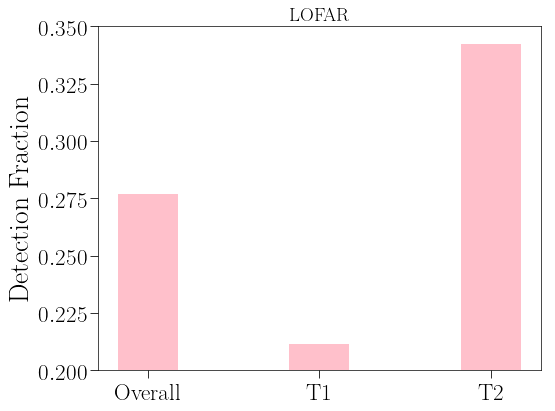

In [18]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Overall', 'T1', 'T2']
Dfracs = [Overall_DFracL,T1_DFracL,T2_DFracL]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x , Dfracs, width, color = 'pink')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Detection Fraction')
ax.set_title('LOFAR')
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)
ax.set_ylim(0.2,0.35)

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [19]:
print ('FIRST')
Overall_DFrac = Total_FIRST/Total_LMatch
print ('Overall Detecttion Fraction is',Overall_DFrac )
T1_DFrac = len(T1LMatchedFIRST)/len(T1LMatched1045)
print ('T1 Detecttion Fraction is',T1_DFrac )
T2_DFrac = len(T2LMatchedFIRST)/len(T2LMatched1045)
print ('T2 Detecttion Fraction is',T2_DFrac )

FIRST
Overall Detecttion Fraction is 0.023192360163710776
T1 Detecttion Fraction is 0.023192360163710776
T2 Detecttion Fraction is 0.023192360163710776


In [20]:
import astropy.stats as stats
IntervalFIRST = stats.binom_conf_interval(Total_FIRST,Total_LMatch)
T1intervalFIRST = stats.binom_conf_interval(len(T1LMatchedFIRST),len(T1LMatched1045))
T2intervalFIRST = stats.binom_conf_interval(len(T2LMatchedFIRST),len(T2LMatched1045))
print(IntervalFIRST,T1intervalFIRST,T2intervalFIRST)

[0.01957424 0.02746053] [0.01824853 0.02943539] [0.01824853 0.02943539]


In [21]:
PlusFIRST = IntervalFIRST[1]-Overall_DFrac
MinusFIRST = Overall_DFrac-IntervalFIRST[0]
print('Overall FIRST = +',PlusFIRST,'-', MinusFIRST)

T1PlusFIRST = T1intervalFIRST[1]-T1_DFrac
T1MinusFIRST = T1_DFrac-T1intervalFIRST[0]
print('T1 FIRST = +',T1PlusFIRST,'-', T1MinusFIRST)

T2PlusFIRST = T2intervalFIRST[1]-T2_DFrac
T2MinusFIRST = T2_DFrac-T2intervalFIRST[0]
print('T2 FIRST = +',T2PlusFIRST,'-', T2MinusFIRST)

Overall FIRST = + 0.004268168282657362 - 0.003618122420478608
T1 FIRST = + 0.006243032733737282 - 0.004943826632301675
T2 FIRST = + 0.006243032733737282 - 0.004943826632301675


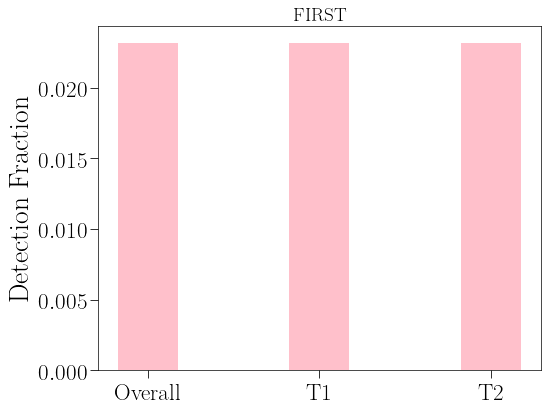

In [22]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Overall', 'T1', 'T2']
Dfracs = [Overall_DFrac,T1_DFrac ,T2_DFrac]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x , Dfracs, width, color = 'pink')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Detection Fraction')
ax.set_title('FIRST')
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)


#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [23]:
print ('XRAY')
Overall_DFracX = Total_XRAY/Total_LMatch
print ('Overall Detecttion Fraction is',Overall_DFracX )
T1_DFracX = len(T1LMatchedXRAYi)/len(T1LMatched1045)
print ('T1 Detecttion Fraction is',T1_DFracX )
T2_DFracX = len(T2LMatchedXRAYi)/len(T2LMatched1045)
print ('T2 Detecttion Fraction is',T2_DFracX )

XRAY
Overall Detecttion Fraction is 0.4829467939972715
T1 Detecttion Fraction is 0.6562073669849932
T2 Detecttion Fraction is 0.3096862210095498


In [24]:
import astropy.stats as stats
Intervalxray = stats.binom_conf_interval(Total_XRAY,Total_LMatch)
T1intervalXray = stats.binom_conf_interval(len(T1LMatchedXRAYi),len(T1LMatched1045))
T2intervalXray = stats.binom_conf_interval(len(T2LMatchedXRAYi),len(T2LMatched1045))
print(Intervalxray,T1intervalXray,T2intervalXray)

[0.46991165 0.49600518] [0.63846167 0.67352743] [0.29287734 0.32701367]


In [25]:
Plusxray = Intervalxray[1]-Overall_DFracX
Minusxray = Overall_DFracX-Intervalxray[0]
print('Overall Xray = +',Plusxray,'-', Minusxray)

T1Plusxray = T1intervalXray[1]-T1_DFracX
T1Minusxray = T1_DFracX-T1intervalXray[0]
print('T1 Xray = +',T1Plusxray,'-', T1Minusxray)

T2Plusxray = T2intervalXray[1]-T2_DFracX
T2Minusxray = T2_DFracX-T2intervalXray[0]
print('T2 Xray = +',T2Plusxray,'-', T2Minusxray)

Overall Xray = + 0.013058389339552445 - 0.013035140202850737
T1 Xray = + 0.01732006275579745 - 0.017745696800473665
T2 Xray = + 0.017327445536566677 - 0.016808878294362783


In [26]:
Total_XRAY

708

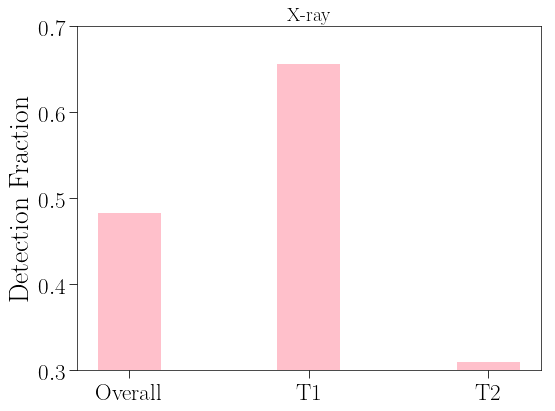

In [27]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Overall', 'T1', 'T2']
Dfracs = [Overall_DFracX,T1_DFracX ,T2_DFracX]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x , Dfracs, width, color = 'pink')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Detection Fraction')
ax.set_title('X-ray')
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)
ax.set_ylim(0.3,0.7)


#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [28]:
T1LMatched1045

RA,Dec,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,Chi2S,SType,LAGNerg,LSbcerg,LEllerg,LIrrerg,AV,LSbc10,LEll10,LIrr10,LAGN10,LSbcUNLOG10,LEllUNLOG10,LIrrUNLOG10,LAGNUNLOG10,LSbcUNLOG10c,LEllUNLOG10c,LIrrUNLOG10c,LAGNUNLOG10c,LGalUNLOG10,LSFRUNLOG10,LAGNmGalUNLOG10,LGalLOG10,LSFRLOG10,LAGNmGalLOG10,LGalerg10,LSFRerg10,LAGNmGalerg10
float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
217.78476,32.37835,18.979999542236328,0.9900000095367432,-99.98999786376953,12/0,0.009999999776482582,113.69999694824219,0.0,-2.7760000228881836,-2.700000047683716,1.649999976158142,26.690000534057617,2.621999979019165,1.5880000591278076,0.0,0.7960000038146973,14.039999961853027,0.05000000074505806,169.69000244140625,f/g,46.202,40.804,43.58,40.879999999999995,0.16000000000000003,10.0,11.588000059127808,10.796000003814697,12.621999979019165,10000000000.0,387257697645.5132,62517269826.69933,4187935448859.356,0.0,387257697645.5132,62517269826.69933,4187935448859.356,449774967472.2125,62517269826.69933,3738160481387.1436,11.652995280821244,10.796000003814697,12.57265794195582,45.23299528082124,44.376000003814696,46.152657941955816
216.34027,32.37844,20.6200008392334,0.9800000190734863,-99.98999786376953,12/0,2.069999933242798,38.5,0.0,0.30000001192092896,2.0910000801086426,1.7999999523162842,3.640000104904175,2.063999891281128,1.3320000171661377,0.0,0.0,39.349998474121094,0.019999999552965164,74.26000213623047,a/f,45.644,43.879999999999995,43.58,45.671,0.064,10.0,11.332000017166138,10.0,12.063999891281128,10000000000.0,214783055902.67413,10000000000.0,1158777066073.2654,0.0,214783055902.67413,0.0,1158777066073.2654,214783055902.67413,0.0,943994010170.5913,11.332000017166138,-inf,11.974969238622101,44.912000017166136,-inf,45.5549692386221
217.72965,32.42403,21.670000076293945,0.9700000286102295,-99.98999786376953,14/0,1.5299999713897705,21.34000015258789,0.0,0.0,1.4600000381469727,1.5299999713897705,1.6299999952316284,1.593999981880188,0.0,0.8629999756813049,0.0,55.38999938964844,0.03999999910593033,22.280000686645508,b/a,45.174,43.58,43.58,45.04,0.128,10.862999975681305,10.0,10.0,11.593999981880188,72945746940.79659,10000000000.0,10000000000.0,392644919017.50757,72945746940.79659,0.0,0.0,392644919017.50757,72945746940.79659,72945746940.79659,319699172076.711,10.862999975681305,10.862999975681305,11.504741511582976,44.4429999756813,44.4429999756813,45.084741511582976
217.10787,32.42816,21.34000015258789,0.7300000190734863,-99.98999786376953,14/0,0.03999999910593033,9.899999618530273,0.0,-2.760999917984009,-2.259999990463257,1.7100000381469727,0.46000000834465027,1.7269999980926514,0.7229999899864197,0.0,0.0,93.94999694824219,0.009999999776482582,10.779999732971191,A/F,45.306999999999995,40.818999999999996,43.58,41.32,0.032,10.0,10.72299998998642,10.0,11.726999998092651,10000000000.0,52844523959.075455,10000000000.0,533334893145.3034,0.0,52844523959.075455,0.0,533334893145.3034,52844523959.075455,0.0,480490369186.22797,10.72299998998642,-inf,11.681684687215398,44.30299998998642,-inf,45.26168468721539
218.17979,32.4394,19.360000610351562,0.7300000190734863,-99.98999786376953,12/1,0.009999999776482582,86.88999938964844,0.0,-2.7139999866485596,-2.940999984741211,1.1299999952316284,6.460000038146973,2.009999990463257,0.671999990940094,0.0,1.5470000505447388,57.04999923706055,0.019999999552965164,165.6199951171875,a/f,45.589999999999996,40.866,43.58,40.638999999999996,0.064,10.0,10.671999990940094,11.547000050544739,12.009999990463257,10000000000.0,46989409880.26585,352370912052.6667,1023292969810.0972,0.0,46989409880.26585,352370912052.6667,1023292969810.0972,399360321932.93256,352370912052.6667,623932647877.16

# Mean Contributions

In [29]:
#EllFracT1 = MaskedColumn(name = "EllFracT1", data = T1LMatched1045['LELLp']/(T1LMatched1045['LELLp']+T1LMatched1045['LIrrp']+T1LMatched1045['LSbcp'])  , dtype=np.float64) 
#T1LMatched1045.add_column(EllFracT1)
#T1LMatched1045.replace_column('EllFracT1',EllFracT1)

#SbcFracT1 = MaskedColumn(name = "SbcFracT1", data = T1LMatched1045['LSbcp']/(T1LMatched1045['LELLp']+T1LMatched1045['LIrrp']+T1LMatched1045['LSbcp'])  , dtype=np.float64) 
#T1LMatched1045.add_column(SbcFracT1)
#T1LMatched1045.replace_column('SbcFracT1',SbcFracT1)

#IrrFracT1 = MaskedColumn(name = "IrrFracT1", data = T1LMatched1045['LIrrp']/(T1LMatched1045['LELLp']+T1LMatched1045['LIrrp']+T1LMatched1045['LSbcp'])  , dtype=np.float64) 
#T1LMatched1045.add_column(IrrFracT1)
#T1LMatched1045.replace_column('IrrFracT1',IrrFracT1)

In [30]:
EllFracT1 = MaskedColumn(name = "EllFracT1", data = T1LMatched1045['LEllUNLOG10c']/(T1LMatched1045['LEllUNLOG10c']+T1LMatched1045['LIrrUNLOG10c']+T1LMatched1045['LSbcUNLOG10c'])  , dtype=np.float64) 
T1LMatched1045.add_column(EllFracT1)
#T1LMatched1045.replace_column('EllFracT1',EllFracT1)

SbcFracT1 = MaskedColumn(name = "SbcFracT1", data = T1LMatched1045['LSbcUNLOG10c']/(T1LMatched1045['LEllUNLOG10c']+T1LMatched1045['LIrrUNLOG10c']+T1LMatched1045['LSbcUNLOG10c'])  , dtype=np.float64) 
T1LMatched1045.add_column(SbcFracT1)
#T1LMatched1045.replace_column('SbcFracT1',SbcFracT1)

IrrFracT1 = MaskedColumn(name = "IrrFracT1", data = T1LMatched1045['LIrrUNLOG10c']/(T1LMatched1045['LEllUNLOG10c']+T1LMatched1045['LIrrUNLOG10c']+T1LMatched1045['LSbcUNLOG10c'])  , dtype=np.float64) 
T1LMatched1045.add_column(IrrFracT1)
#T1LMatched1045.replace_column('IrrFracT1',IrrFracT1)

In [31]:
EllFracT2 = MaskedColumn(name = "EllFracT2", data = T2LMatched1045['LEllUNLOG10c']/(T2LMatched1045['LEllUNLOG10c']+T2LMatched1045['LIrrUNLOG10c']+T2LMatched1045['LSbcUNLOG10c'])  , dtype=np.float64) 
T2LMatched1045.add_column(EllFracT2)
#T2LMatched1045.replace_column('EllFracT2',EllFracT2)

SbcFracT2 = MaskedColumn(name = "SbcFracT2", data = T2LMatched1045['LSbcUNLOG10c']/(T2LMatched1045['LEllUNLOG10c']+T2LMatched1045['LIrrUNLOG10c']+T2LMatched1045['LSbcUNLOG10c'])  , dtype=np.float64) 
T2LMatched1045.add_column(SbcFracT2)
#T2LMatched1045.replace_column('SbcFracT2',SbcFracT2)

IrrFracT2 = MaskedColumn(name = "IrrFracT2", data = T2LMatched1045['LIrrUNLOG10c']/(T2LMatched1045['LEllUNLOG10c']+T2LMatched1045['LIrrUNLOG10c']+T2LMatched1045['LSbcUNLOG10c'])  , dtype=np.float64) 
T2LMatched1045.add_column(IrrFracT2)
#T2LMatched1045.replace_column('IrrFracT2',IrrFracT2)

In [32]:
#EllFracT2 = MaskedColumn(name = "EllFracT2", data = T2LMatched1045['LELLp']/(T2LMatched1045['LELLp']+T2LMatched1045['LIrrp']+T2LMatched1045['LSbcp'])  , dtype=np.float64) 
#T2LMatched1045.add_column(EllFracT2)
#T2LMatched1045.replace_column('EllFracT2',EllFracT2)

#SbcFracT2 = MaskedColumn(name = "SbcFracT2", data = T2LMatched1045['LSbcp']/(T2LMatched1045['LELLp']+T2LMatched1045['LIrrp']+T2LMatched1045['LSbcp'])  , dtype=np.float64) 
#T2LMatched1045.add_column(SbcFracT2)
#T2LMatched1045.replace_column('SbcFracT2',SbcFracT2)

#IrrFracT2 = MaskedColumn(name = "IrrFracT2", data = T2LMatched1045['LIrrp']/(T2LMatched1045['LELLp']+T2LMatched1045['LIrrp']+T2LMatched1045['LSbcp'])  , dtype=np.float64) 
#T2LMatched1045.add_column(IrrFracT2)
#T2LMatched1045.replace_column('IrrFracT2',IrrFracT2)

In [33]:
EllFracT1 = T1LMatched1045[np.isfinite(T1LMatched1045['EllFracT1'])]
SbcFracT1 = T1LMatched1045[np.isfinite(T1LMatched1045['SbcFracT1'])]
IrrFracT1 = T1LMatched1045[np.isfinite(T1LMatched1045['IrrFracT1'])]

EllFracT2 = T2LMatched1045[np.isfinite(T2LMatched1045['EllFracT2'])]
SbcFracT2 = T2LMatched1045[np.isfinite(T2LMatched1045['SbcFracT2'])]
IrrFracT2 = T2LMatched1045[np.isfinite(T2LMatched1045['IrrFracT2'])]

In [34]:
SbcFracT1

RA,Dec,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,Chi2S,SType,LAGNerg,LSbcerg,LEllerg,LIrrerg,AV,LSbc10,LEll10,LIrr10,LAGN10,LSbcUNLOG10,LEllUNLOG10,LIrrUNLOG10,LAGNUNLOG10,LSbcUNLOG10c,LEllUNLOG10c,LIrrUNLOG10c,LAGNUNLOG10c,LGalUNLOG10,LSFRUNLOG10,LAGNmGalUNLOG10,LGalLOG10,LSFRLOG10,LAGNmGalLOG10,LGalerg10,LSFRerg10,LAGNmGalerg10,EllFracT1,SbcFracT1,IrrFracT1
float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
217.78476,32.37835,18.979999542236328,0.9900000095367432,-99.98999786376953,12/0,0.009999999776482582,113.69999694824219,0.0,-2.7760000228881836,-2.700000047683716,1.649999976158142,26.690000534057617,2.621999979019165,1.5880000591278076,0.0,0.7960000038146973,14.039999961853027,0.05000000074505806,169.69000244140625,f/g,46.202,40.804,43.58,40.879999999999995,0.16000000000000003,10.0,11.588000059127808,10.796000003814697,12.621999979019165,10000000000.0,387257697645.5132,62517269826.69933,4187935448859.356,0.0,387257697645.5132,62517269826.69933,4187935448859.356,449774967472.2125,62517269826.69933,3738160481387.1436,11.652995280821244,10.796000003814697,12.57265794195582,45.23299528082124,44.376000003814696,46.152657941955816,0.8610032252838489,0.0,0.13899677471615116
216.34027,32.37844,20.6200008392334,0.9800000190734863,-99.98999786376953,12/0,2.069999933242798,38.5,0.0,0.30000001192092896,2.0910000801086426,1.7999999523162842,3.640000104904175,2.063999891281128,1.3320000171661377,0.0,0.0,39.349998474121094,0.019999999552965164,74.26000213623047,a/f,45.644,43.879999999999995,43.58,45.671,0.064,10.0,11.332000017166138,10.0,12.063999891281128,10000000000.0,214783055902.67413,10000000000.0,1158777066073.2654,0.0,214783055902.67413,0.0,1158777066073.2654,214783055902.67413,0.0,943994010170.5913,11.332000017166138,-inf,11.974969238622101,44.912000017166136,-inf,45.5549692386221,1.0,0.0,0.0
217.72965,32.42403,21.670000076293945,0.9700000286102295,-99.98999786376953,14/0,1.5299999713897705,21.34000015258789,0.0,0.0,1.4600000381469727,1.5299999713897705,1.6299999952316284,1.593999981880188,0.0,0.8629999756813049,0.0,55.38999938964844,0.03999999910593033,22.280000686645508,b/a,45.174,43.58,43.58,45.04,0.128,10.862999975681305,10.0,10.0,11.593999981880188,72945746940.79659,10000000000.0,10000000000.0,392644919017.50757,72945746940.79659,0.0,0.0,392644919017.50757,72945746940.79659,72945746940.79659,319699172076.711,10.862999975681305,10.862999975681305,11.504741511582976,44.4429999756813,44.4429999756813,45.084741511582976,0.0,1.0,0.0
217.10787,32.42816,21.34000015258789,0.7300000190734863,-99.98999786376953,14/0,0.03999999910593033,9.899999618530273,0.0,-2.760999917984009,-2.259999990463257,1.7100000381469727,0.46000000834465027,1.7269999980926514,0.7229999899864197,0.0,0.0,93.94999694824219,0.009999999776482582,10.779999732971191,A/F,45.306999999999995,40.818999999999996,43.58,41.32,0.032,10.0,10.72299998998642,10.0,11.726999998092651,10000000000.0,52844523959.075455,10000000000.0,533334893145.3034,0.0,52844523959.075455,0.0,533334893145.3034,52844523959.075455,0.0,480490369186.22797,10.72299998998642,-inf,11.681684687215398,44.30299998998642,-inf,45.26168468721539,1.0,0.0,0.0
218.17979,32.4394,19.360000610351562,0.7300000190734863,-99.98999786376953,12/1,0.009999999776482582,86.88999938964844,0.0,-2.7139999866485596,-2.940999984741211,1.1299999952316284,6.460000038146973,2.009999990463257,0.671999990940094,0.0,1.5470000505447388,57.04999923706055,0.019999999552965164,165.6199951171875,a/f,45.589999999999996,40.866,43.58,40.638999999999996,0.064,10.0,10.671999990940094,11.547000050544739,12.009999990463257,10000000000.0,46989409880.26585,352370912052.66

In [35]:
print ( 'The Elliptical mean T1 contribtuion is:', np.mean(EllFracT1['EllFracT1']))
print ( 'The Spiral mean T1 contribtuion is:', np.mean(SbcFracT1['SbcFracT1']))
print ( 'The Irregular mean T1 contribtuion is:', np.mean(IrrFracT1['IrrFracT1']))


The Elliptical mean T1 contribtuion is: 0.44346593682167407
The Spiral mean T1 contribtuion is: 0.2121418890558662
The Irregular mean T1 contribtuion is: 0.34439217412245976


In [36]:
print ( 'The Elliptical mean T2 contribtuion is:', np.mean(EllFracT2['EllFracT2']))
print ( 'The Spiral mean T2 contribtuion is:', np.mean(SbcFracT2['SbcFracT2']))
print ( 'The Irregular mean T2 contribtuion is:', np.mean(IrrFracT2['IrrFracT2']))

The Elliptical mean T2 contribtuion is: 0.32883045987394144
The Spiral mean T2 contribtuion is: 0.2737910855464736
The Irregular mean T2 contribtuion is: 0.39737845457958487


In [58]:
EllFracT2['EllFracT2']

0.0
0.0
0.638100699974099
0.0
0.0
1.0
1.0
0.7033850034718286
0.5247325782972024
0.0
0.0


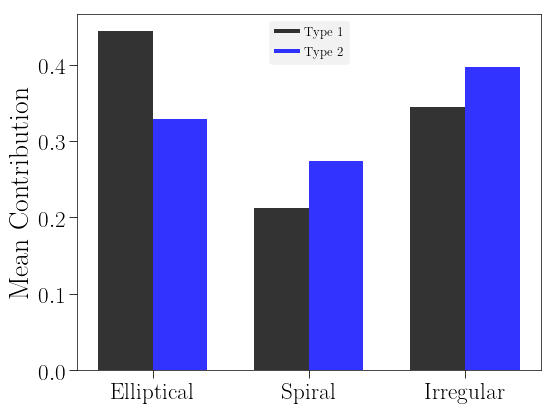

In [59]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Elliptical', 'Spiral', 'Irregular']
T1_means = [np.mean(EllFracT1['EllFracT1']), np.mean(SbcFracT1['SbcFracT1']), np.mean(IrrFracT1['IrrFracT1'])]
T2_means = [np.mean(EllFracT2['EllFracT2']), np.mean(SbcFracT2['SbcFracT2']), np.mean(IrrFracT2['IrrFracT2'])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, T1_means, width, label='Type 1', color = 'black', alpha = 0.8)
rects2 = ax.bar(x + width/2, T2_means, width, label='Type 2', color = 'blue', alpha = 0.8)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Contribution')
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)
ax.legend(fontsize = 13,frameon = True, framealpha=0.1, facecolor = 'gray', loc = 9)
plt.savefig('Figure12.png')
#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()



# Splitting by redshift and luminosity 

In [39]:
LZEllFracT1 = EllFracT1[EllFracT1['zGA']<=1]
LZSbcFracT1 = SbcFracT1[SbcFracT1['zGA']<=1]
LZIrrFracT1 = IrrFracT1[IrrFracT1['zGA']<=1]

LZEllFracT2 = EllFracT2[EllFracT2['zGA']<=1]
LZSbcFracT2 = SbcFracT2[SbcFracT2['zGA']<=1]
LZIrrFracT2 = IrrFracT2[IrrFracT2['zGA']<=1]

In [40]:
MZEllFracT1 = EllFracT1[np.logical_and((EllFracT1['zGA']>1),(EllFracT1['zGA']<2))]
MZSbcFracT1 = SbcFracT1[np.logical_and((SbcFracT1['zGA']>1),(SbcFracT1['zGA']<2))]
MZIrrFracT1 = IrrFracT1[np.logical_and((IrrFracT1['zGA']>1),(IrrFracT1['zGA']<2))]

MZEllFracT2 = EllFracT2[np.logical_and((EllFracT2['zGA']>1),(EllFracT2['zGA']<2))]
MZSbcFracT2 = SbcFracT2[np.logical_and((SbcFracT2['zGA']>1),(SbcFracT2['zGA']<2))]
MZIrrFracT2 = IrrFracT2[np.logical_and((IrrFracT2['zGA']>1),(IrrFracT2['zGA']<2))]

In [41]:
HZEllFracT1 = EllFracT1[EllFracT1['zGA']>=2]
HZSbcFracT1 = SbcFracT1[SbcFracT1['zGA']>=2]
HZIrrFracT1 = IrrFracT1[IrrFracT1['zGA']>=2]

HZEllFracT2 = EllFracT2[EllFracT2['zGA']>=2]
HZSbcFracT2 = SbcFracT2[SbcFracT2['zGA']>=2]
HZIrrFracT2 = IrrFracT2[IrrFracT2['zGA']>=2]

In [42]:
LLEllFracT1 = EllFracT1[EllFracT1['LAGNerg']<=np.percentile(EllFracT1['LAGNerg'],33.3)]
LLSbcFracT1 = SbcFracT1[SbcFracT1['LAGNerg']<=np.percentile(SbcFracT1['LAGNerg'],33.3)]
LLIrrFracT1 = IrrFracT1[IrrFracT1['LAGNerg']<=np.percentile(IrrFracT1['LAGNerg'],33.3)]

LLEllFracT2 = EllFracT2[EllFracT2['LAGNerg']<=np.percentile(EllFracT2['LAGNerg'],33.3)]
LLSbcFracT2 = SbcFracT2[SbcFracT2['LAGNerg']<=np.percentile(SbcFracT2['LAGNerg'],33.3)]
LLIrrFracT2 = IrrFracT2[IrrFracT2['LAGNerg']<=np.percentile(IrrFracT2['LAGNerg'],33.3)]

In [43]:
MLEllFracT1 = EllFracT1[np.logical_and((EllFracT1['LAGNerg']>np.percentile(EllFracT1['LAGNerg'],33.3)),(EllFracT1['LAGNerg']<np.percentile(EllFracT1['LAGNerg'],66.6)))]
MLSbcFracT1 = SbcFracT1[np.logical_and((SbcFracT1['LAGNerg']>np.percentile(SbcFracT1['LAGNerg'],33.3)),(SbcFracT1['LAGNerg']<np.percentile(SbcFracT1['LAGNerg'],66.6)))]
MLIrrFracT1 = IrrFracT1[np.logical_and((IrrFracT1['LAGNerg']>np.percentile(IrrFracT1['LAGNerg'],33.3)),(IrrFracT1['LAGNerg']<np.percentile(IrrFracT1['LAGNerg'],66.6)))]

MLEllFracT2 = EllFracT2[np.logical_and((EllFracT2['LAGNerg']>np.percentile(EllFracT2['LAGNerg'],33.3)),(EllFracT2['LAGNerg']<np.percentile(EllFracT2['LAGNerg'],66.6)))]
MLSbcFracT2 = SbcFracT2[np.logical_and((SbcFracT2['LAGNerg']>np.percentile(SbcFracT2['LAGNerg'],33.3)),(SbcFracT2['LAGNerg']<np.percentile(SbcFracT2['LAGNerg'],66.6)))]
MLIrrFracT2 = IrrFracT2[np.logical_and((IrrFracT2['LAGNerg']>np.percentile(IrrFracT2['LAGNerg'],33.3)),(IrrFracT2['LAGNerg']<np.percentile(IrrFracT2['LAGNerg'],66.6)))]

In [44]:
HLEllFracT1 = EllFracT1[EllFracT1['LAGNerg']>=np.percentile(EllFracT1['LAGNerg'],66.6)]
HLSbcFracT1 = SbcFracT1[SbcFracT1['LAGNerg']>=np.percentile(SbcFracT1['LAGNerg'],66.6)]
HLIrrFracT1 = IrrFracT1[IrrFracT1['LAGNerg']>=np.percentile(IrrFracT1['LAGNerg'],66.6)]

HLEllFracT2 = EllFracT2[EllFracT2['LAGNerg']>=np.percentile(EllFracT2['LAGNerg'],66.6)]
HLSbcFracT2 = SbcFracT2[SbcFracT2['LAGNerg']>=np.percentile(SbcFracT2['LAGNerg'],66.6)]
HLIrrFracT2 = IrrFracT2[IrrFracT2['LAGNerg']>=np.percentile(IrrFracT2['LAGNerg'],66.6)]

In [45]:
LLGEllFracT1 = EllFracT1[EllFracT1['LGalerg10']<=np.percentile(EllFracT1['LGalerg10'],33.3)]
LLGSbcFracT1 = SbcFracT1[SbcFracT1['LGalerg10']<=np.percentile(SbcFracT1['LGalerg10'],33.3)]
LLGIrrFracT1 = IrrFracT1[IrrFracT1['LGalerg10']<=np.percentile(IrrFracT1['LGalerg10'],33.3)]

LLGEllFracT2 = EllFracT2[EllFracT2['LGalerg10']<=np.percentile(EllFracT2['LGalerg10'],33.3)]
LLGSbcFracT2 = SbcFracT2[SbcFracT2['LGalerg10']<=np.percentile(SbcFracT2['LGalerg10'],33.3)]
LLGIrrFracT2 = IrrFracT2[IrrFracT2['LGalerg10']<=np.percentile(IrrFracT2['LGalerg10'],33.3)]

In [46]:
MLGEllFracT1 = EllFracT1[np.logical_and((EllFracT1['LGalerg10']>np.percentile(EllFracT1['LGalerg10'],33.3)),(EllFracT1['LGalerg10']<np.percentile(EllFracT1['LGalerg10'],66.6)))]
MLGSbcFracT1 = SbcFracT1[np.logical_and((SbcFracT1['LGalerg10']>np.percentile(SbcFracT1['LGalerg10'],33.3)),(SbcFracT1['LGalerg10']<np.percentile(SbcFracT1['LGalerg10'],66.6)))]
MLGIrrFracT1 = IrrFracT1[np.logical_and((IrrFracT1['LGalerg10']>np.percentile(IrrFracT1['LGalerg10'],33.3)),(IrrFracT1['LGalerg10']<np.percentile(IrrFracT1['LGalerg10'],66.6)))]

MLGEllFracT2 = EllFracT2[np.logical_and((EllFracT2['LGalerg10']>np.percentile(EllFracT2['LGalerg10'],33.3)),(EllFracT2['LGalerg10']<np.percentile(EllFracT2['LGalerg10'],66.6)))]
MLGSbcFracT2 = SbcFracT2[np.logical_and((SbcFracT2['LGalerg10']>np.percentile(SbcFracT2['LGalerg10'],33.3)),(SbcFracT2['LGalerg10']<np.percentile(SbcFracT2['LGalerg10'],66.6)))]
MLGIrrFracT2 = IrrFracT2[np.logical_and((IrrFracT2['LGalerg10']>np.percentile(IrrFracT2['LGalerg10'],33.3)),(IrrFracT2['LGalerg10']<np.percentile(IrrFracT2['LGalerg10'],66.6)))]

In [47]:
HLGEllFracT1 = EllFracT1[EllFracT1['LGalerg10']>=np.percentile(EllFracT1['LGalerg10'],66.6)]
HLGSbcFracT1 = SbcFracT1[SbcFracT1['LGalerg10']>=np.percentile(SbcFracT1['LGalerg10'],66.6)]
HLGIrrFracT1 = IrrFracT1[IrrFracT1['LGalerg10']>=np.percentile(IrrFracT1['LGalerg10'],66.6)]

HLGEllFracT2 = EllFracT2[EllFracT2['LGalerg10']>=np.percentile(EllFracT2['LGalerg10'],66.6)]
HLGSbcFracT2 = SbcFracT2[SbcFracT2['LGalerg10']>=np.percentile(SbcFracT2['LGalerg10'],66.6)]
HLGIrrFracT2 = IrrFracT2[IrrFracT2['LGalerg10']>=np.percentile(IrrFracT2['LGalerg10'],66.6)]

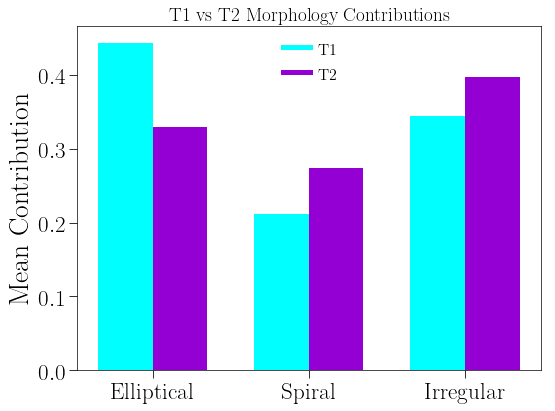

In [48]:

import matplotlib.pyplot as plt
import numpy as np


labels = ['Elliptical', 'Spiral', 'Irregular']
T1_means = [np.mean(EllFracT1['EllFracT1']), np.mean(SbcFracT1['SbcFracT1']), np.mean(IrrFracT1['IrrFracT1'])]
T2_means = [np.mean(EllFracT2['EllFracT2']), np.mean(SbcFracT2['SbcFracT2']), np.mean(IrrFracT2['IrrFracT2'])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x - width/2, T1_means, width, label='T1', color ='cyan')
rects2 = ax.bar(x + width/2, T2_means, width, label='T2', color ='darkviolet')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Contribution')
ax.set_title('T1 vs T2 Morphology Contributions')
ax.set_xticks([0,1,2])
ax.set_xticklabels(labels)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()


In [49]:


labels = ['Elliptical', 'Spiral', 'Irregular']
T1_meansLZ = [np.mean(LZEllFracT1['EllFracT1']), np.mean(LZSbcFracT1['SbcFracT1']), np.mean(LZIrrFracT1['IrrFracT1'])]
T2_meansLZ = [np.mean(LZEllFracT2['EllFracT2']), np.mean(LZSbcFracT2['SbcFracT2']), np.mean(LZIrrFracT2['IrrFracT2'])]

T1_meansMZ = [np.mean(MZEllFracT1['EllFracT1']), np.mean(MZSbcFracT1['SbcFracT1']), np.mean(MZIrrFracT1['IrrFracT1'])]
T2_meansMZ = [np.mean(MZEllFracT2['EllFracT2']), np.mean(MZSbcFracT2['SbcFracT2']), np.mean(MZIrrFracT2['IrrFracT2'])]

T1_meansHZ = [np.mean(HZEllFracT1['EllFracT1']), np.mean(HZSbcFracT1['SbcFracT1']), np.mean(HZIrrFracT1['IrrFracT1'])]
T2_meansHZ = [np.mean(HZEllFracT2['EllFracT2']), np.mean(HZSbcFracT2['SbcFracT2']), np.mean(HZIrrFracT2['IrrFracT2'])]


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars



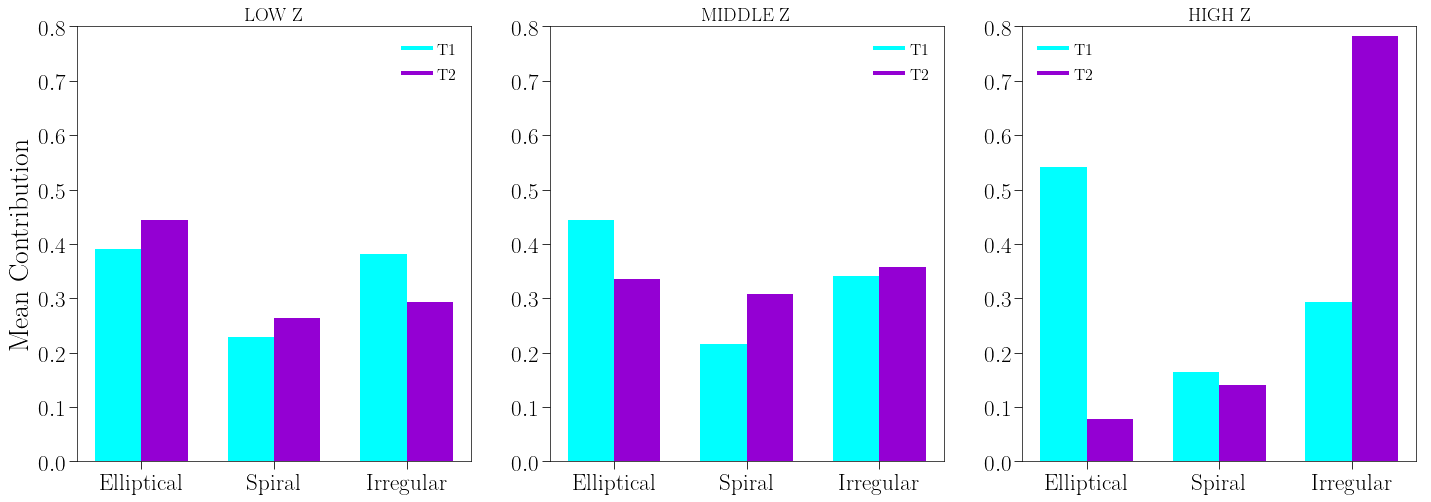

In [50]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=1,ncols=3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
rects1 = ax1.bar(x - width/2, T1_meansLZ, width, label='T1',color ='cyan')
rects2 = ax1.bar(x + width/2, T2_meansLZ, width, label='T2', color ='darkviolet')
ax1.set_ylabel('Mean Contribution')
ax1.set_title('LOW Z')
ax1.set_xticks([0,1,2])
ax1.set_xticklabels(labels)
ax1.set_ylim(0,0.8)
ax1.legend()

ax2 = fig.add_subplot(gs[0,1])
rects1 = ax2.bar(x - width/2, T1_meansMZ, width, label='T1',color ='cyan')
rects2 = ax2.bar(x + width/2, T2_meansMZ, width, label='T2', color ='darkviolet')
ax2.set_title('MIDDLE Z')
ax2.set_xticks([0,1,2])
ax2.set_xticklabels(labels)
ax2.set_ylim(0,0.8)
ax2.legend()

ax3 = fig.add_subplot(gs[0,2])
rects1 = ax3.bar(x - width/2, T1_meansHZ, width, label='T1',color ='cyan')
rects2 = ax3.bar(x + width/2, T2_meansHZ, width, label='T2', color ='darkviolet')
ax3.set_title('HIGH Z')
ax3.set_xticks([0,1,2])
ax3.set_xticklabels(labels)
ax3.set_ylim(0,0.8)
ax3.legend()

In [51]:
labels = ['Elliptical', 'Spiral', 'Irregular']
T1_meansLL = [np.mean(LLEllFracT1['EllFracT1']), np.mean(LLSbcFracT1['SbcFracT1']), np.mean(LLIrrFracT1['IrrFracT1'])]
T2_meansLL = [np.mean(LLEllFracT2['EllFracT2']), np.mean(LLSbcFracT2['SbcFracT2']), np.mean(LLIrrFracT2['IrrFracT2'])]

T1_meansML = [np.mean(MLEllFracT1['EllFracT1']), np.mean(MLSbcFracT1['SbcFracT1']), np.mean(MLIrrFracT1['IrrFracT1'])]
T2_meansML = [np.mean(MLEllFracT2['EllFracT2']), np.mean(MLSbcFracT2['SbcFracT2']), np.mean(MLIrrFracT2['IrrFracT2'])]

T1_meansHL = [np.mean(HLEllFracT1['EllFracT1']), np.mean(HLSbcFracT1['SbcFracT1']), np.mean(HLIrrFracT1['IrrFracT1'])]
T2_meansHL = [np.mean(HLEllFracT2['EllFracT2']), np.mean(HLSbcFracT2['SbcFracT2']), np.mean(HLIrrFracT2['IrrFracT2'])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


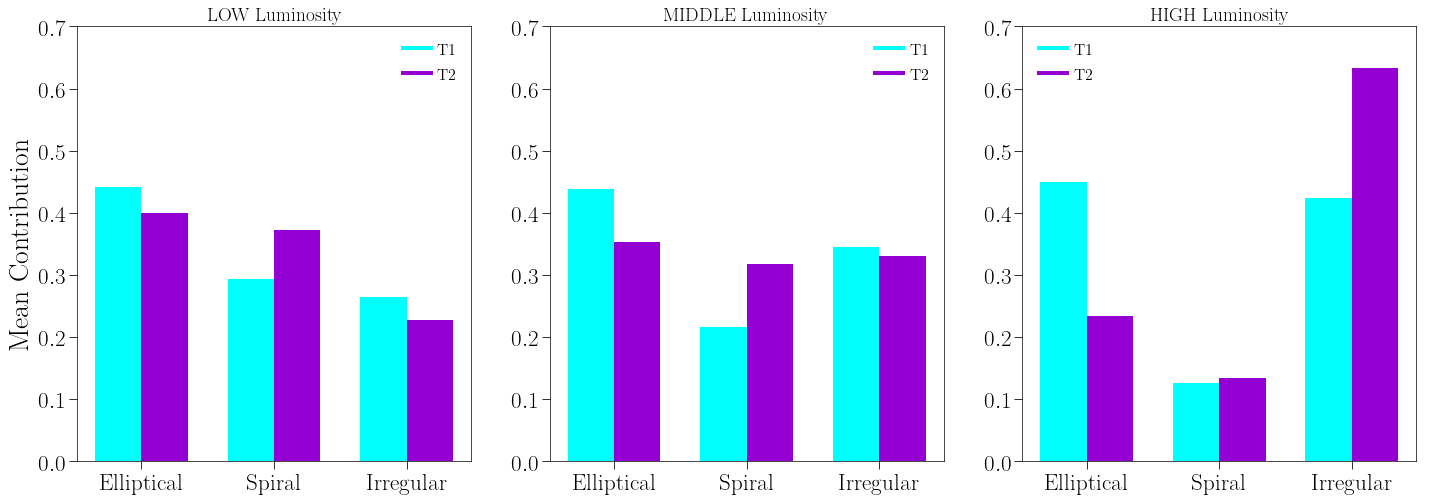

In [52]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=1,ncols=3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
rects1 = ax1.bar(x - width/2, T1_meansLL, width, label='T1',color ='cyan')
rects2 = ax1.bar(x + width/2, T2_meansLL, width, label='T2', color ='darkviolet')
ax1.set_ylabel('Mean Contribution')
ax1.set_title('LOW Luminosity')
ax1.set_xticks([0,1,2])
ax1.set_xticklabels(labels)
ax1.set_ylim(0,0.7)
ax1.legend()

ax2 = fig.add_subplot(gs[0,1])
rects1 = ax2.bar(x - width/2, T1_meansML, width, label='T1',color ='cyan')
rects2 = ax2.bar(x + width/2, T2_meansML, width, label='T2', color ='darkviolet')
ax2.set_title('MIDDLE Luminosity')
ax2.set_xticks([0,1,2])
ax2.set_xticklabels(labels)
ax2.set_ylim(0,0.7)
ax2.legend()

ax3 = fig.add_subplot(gs[0,2])
rects1 = ax3.bar(x - width/2, T1_meansHL, width, label='T1',color ='cyan')
rects2 = ax3.bar(x + width/2, T2_meansHL, width, label='T2', color ='darkviolet')
ax3.set_title('HIGH Luminosity')
ax3.set_xticks([0,1,2])
ax3.set_xticklabels(labels)
ax3.set_ylim(0,0.7)
ax3.legend()

In [53]:
labels = ['Elliptical', 'Spiral', 'Irregular']
T1_meansLLG = [np.mean(LLGEllFracT1['EllFracT1']), np.mean(LLGSbcFracT1['SbcFracT1']), np.mean(LLGIrrFracT1['IrrFracT1'])]
T2_meansLLG = [np.mean(LLGEllFracT2['EllFracT2']), np.mean(LLGSbcFracT2['SbcFracT2']), np.mean(LLGIrrFracT2['IrrFracT2'])]

T1_meansMLG = [np.mean(MLGEllFracT1['EllFracT1']), np.mean(MLGSbcFracT1['SbcFracT1']), np.mean(MLGIrrFracT1['IrrFracT1'])]
T2_meansMLG = [np.mean(MLGEllFracT2['EllFracT2']), np.mean(MLGSbcFracT2['SbcFracT2']), np.mean(MLGIrrFracT2['IrrFracT2'])]

T1_meansHLG = [np.mean(HLGEllFracT1['EllFracT1']), np.mean(HLGSbcFracT1['SbcFracT1']), np.mean(HLGIrrFracT1['IrrFracT1'])]
T2_meansHLG = [np.mean(HLGEllFracT2['EllFracT2']), np.mean(HLGSbcFracT2['SbcFracT2']), np.mean(HLGIrrFracT2['IrrFracT2'])]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars


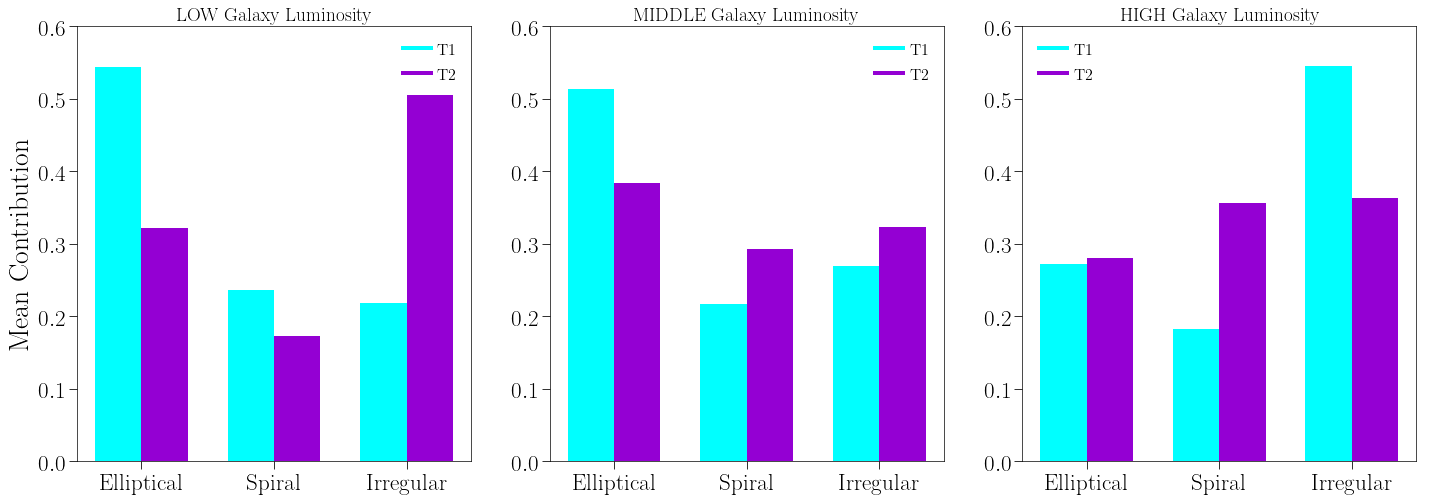

In [54]:
fig = plt.figure(figsize=(24,8))
gs = GridSpec(nrows=1,ncols=3, figure=fig)

ax1 = fig.add_subplot(gs[0, 0])
rects1 = ax1.bar(x - width/2, T1_meansLLG, width, label='T1',color ='cyan')
rects2 = ax1.bar(x + width/2, T2_meansLLG, width, label='T2', color ='darkviolet')
ax1.set_ylabel('Mean Contribution')
ax1.set_title('LOW Galaxy Luminosity')
ax1.set_xticks([0,1,2])
ax1.set_xticklabels(labels)
ax1.set_ylim(0,0.6)
ax1.legend()

ax2 = fig.add_subplot(gs[0,1])
rects1 = ax2.bar(x - width/2, T1_meansMLG, width, label='T1',color ='cyan')
rects2 = ax2.bar(x + width/2, T2_meansMLG, width, label='T2', color ='darkviolet')
ax2.set_title('MIDDLE Galaxy Luminosity')
ax2.set_xticks([0,1,2])
ax2.set_xticklabels(labels)
ax2.set_ylim(0,0.6)
ax2.legend()

ax3 = fig.add_subplot(gs[0,2])
rects1 = ax3.bar(x - width/2, T1_meansHLG, width, label='T1',color ='cyan')
rects2 = ax3.bar(x + width/2, T2_meansHLG, width, label='T2', color ='darkviolet')
ax3.set_title('HIGH Galaxy Luminosity')
ax3.set_xticks([0,1,2])
ax3.set_xticklabels(labels)
ax3.set_ylim(0,0.6)
ax3.legend()

In [55]:
print (T1LMatched1045['LAGNerg']-T1LMatched1045['LGalerg10'])

      LAGNerg      
-------------------
 0.9690047191787556
 0.7319999828338624
 0.7310000243186963
  1.004000010013577
0.40863508623943545
 0.6999999861717257
 0.6079999485015861
  0.742122078727391
 1.0139999923706071
0.43981856792209584
                ...
 1.0620000343322786
   0.53233391836077
0.23980959086793519
0.21905113375925822
 0.6300761171637461
 0.5426701677964658
 1.3349999732971156
 1.4029999504089332
 0.5490711222749312
 0.3230334105382511
 0.7980000295639016
Length = 733 rows


In [56]:
T1LMatched1045

RA,Dec,Imag,S,zspec,N,zG,chi2G,LEll,LSbc,LIrr,zGA,chi2GA,LAGNp,LELLp,LSbcp,LIrrp,F,EBV,Chi2S,SType,LAGNerg,LSbcerg,LEllerg,LIrrerg,AV,LSbc10,LEll10,LIrr10,LAGN10,LSbcUNLOG10,LEllUNLOG10,LIrrUNLOG10,LAGNUNLOG10,LSbcUNLOG10c,LEllUNLOG10c,LIrrUNLOG10c,LAGNUNLOG10c,LGalUNLOG10,LSFRUNLOG10,LAGNmGalUNLOG10,LGalLOG10,LSFRLOG10,LAGNmGalLOG10,LGalerg10,LSFRerg10,LAGNmGalerg10,EllFracT1,SbcFracT1,IrrFracT1
float64,float64,float64,float64,float64,str4,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,str5,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
217.78476,32.37835,18.979999542236328,0.9900000095367432,-99.98999786376953,12/0,0.009999999776482582,113.69999694824219,0.0,-2.7760000228881836,-2.700000047683716,1.649999976158142,26.690000534057617,2.621999979019165,1.5880000591278076,0.0,0.7960000038146973,14.039999961853027,0.05000000074505806,169.69000244140625,f/g,46.202,40.804,43.58,40.879999999999995,0.16000000000000003,10.0,11.588000059127808,10.796000003814697,12.621999979019165,10000000000.0,387257697645.5132,62517269826.69933,4187935448859.356,0.0,387257697645.5132,62517269826.69933,4187935448859.356,449774967472.2125,62517269826.69933,3738160481387.1436,11.652995280821244,10.796000003814697,12.57265794195582,45.23299528082124,44.376000003814696,46.152657941955816,0.8610032252838489,0.0,0.13899677471615116
216.34027,32.37844,20.6200008392334,0.9800000190734863,-99.98999786376953,12/0,2.069999933242798,38.5,0.0,0.30000001192092896,2.0910000801086426,1.7999999523162842,3.640000104904175,2.063999891281128,1.3320000171661377,0.0,0.0,39.349998474121094,0.019999999552965164,74.26000213623047,a/f,45.644,43.879999999999995,43.58,45.671,0.064,10.0,11.332000017166138,10.0,12.063999891281128,10000000000.0,214783055902.67413,10000000000.0,1158777066073.2654,0.0,214783055902.67413,0.0,1158777066073.2654,214783055902.67413,0.0,943994010170.5913,11.332000017166138,-inf,11.974969238622101,44.912000017166136,-inf,45.5549692386221,1.0,0.0,0.0
217.72965,32.42403,21.670000076293945,0.9700000286102295,-99.98999786376953,14/0,1.5299999713897705,21.34000015258789,0.0,0.0,1.4600000381469727,1.5299999713897705,1.6299999952316284,1.593999981880188,0.0,0.8629999756813049,0.0,55.38999938964844,0.03999999910593033,22.280000686645508,b/a,45.174,43.58,43.58,45.04,0.128,10.862999975681305,10.0,10.0,11.593999981880188,72945746940.79659,10000000000.0,10000000000.0,392644919017.50757,72945746940.79659,0.0,0.0,392644919017.50757,72945746940.79659,72945746940.79659,319699172076.711,10.862999975681305,10.862999975681305,11.504741511582976,44.4429999756813,44.4429999756813,45.084741511582976,0.0,1.0,0.0
217.10787,32.42816,21.34000015258789,0.7300000190734863,-99.98999786376953,14/0,0.03999999910593033,9.899999618530273,0.0,-2.760999917984009,-2.259999990463257,1.7100000381469727,0.46000000834465027,1.7269999980926514,0.7229999899864197,0.0,0.0,93.94999694824219,0.009999999776482582,10.779999732971191,A/F,45.306999999999995,40.818999999999996,43.58,41.32,0.032,10.0,10.72299998998642,10.0,11.726999998092651,10000000000.0,52844523959.075455,10000000000.0,533334893145.3034,0.0,52844523959.075455,0.0,533334893145.3034,52844523959.075455,0.0,480490369186.22797,10.72299998998642,-inf,11.681684687215398,44.30299998998642,-inf,45.26168468721539,1.0,0.0,0.0
218.17979,32.4394,19.360000610351562,0.7300000190734863,-99.98999786376953,12/1,0.009999999776482582,86.88999938964844,0.0,-2.7139999866485596,-2.940999984741211,1.1299999952316284,6.460000038146973,2.009999990463257,0.671999990940094,0.0,1.5470000505447388,57.04999923706055,0.019999999552965164,165.6199951171875,a/f,45.589999999999996,40.866,43.58,40.638999999999996,0.064,10.0,10.671999990940094,11.547000050544739,12.009999990463257,10000000000.0,46989409880.26585,352370912052.66

In [57]:
10**(2.62)

416.8693834703355